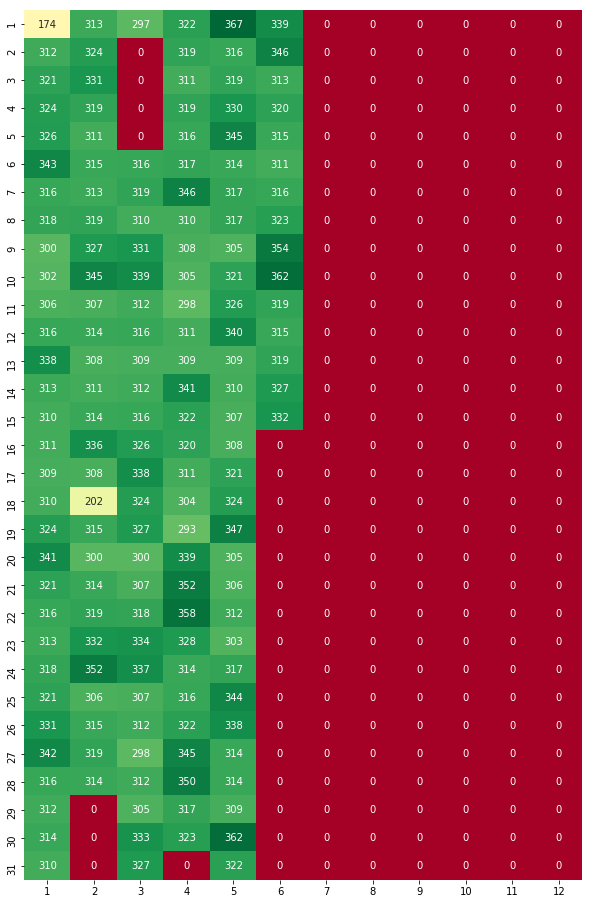

In [46]:
import time
import datetime
import sqlite3
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns  # für das Styling der Ausgabe https://pandas.pydata.org/pandas-docs/stable/style.html#Builtin-Styles


# Ziel: Wie viele Songs wurden am Tag gespielt. Am besten für das ganze Jahr

# Erstmal das heutige Datum feststellen
end_date = datetime.date.today()
start_date = datetime.date(2019, 1, 1)

# Quelle: https://stackoverflow.com/questions/1060279/iterating-through-a-range-of-dates-in-python 
def daterange(start_date, end_date): 
    for n in range(int ((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)


# Daten aus Datenbank laden
connection = sqlite3.connect('../db.sqlite3')
df = pd.read_sql_query("""SELECT bayern3.id, datum_zeit, interpret, titel, label FROM bayern3 
                        INNER JOIN songs ON bayern3.song=songs.id""", connection, index_col='id')
connection.close()

# Spalte mit nur dem Datum hinzufügen
df['datum'] = pd.to_datetime(df['datum_zeit']).dt.date
# Separaten DataFrame für den Vergleich
vergleich = pd.DataFrame()
# Eine Spalte je Kalenderwoche, titel als Index
for single_date in daterange(start_date, end_date):
    vergleich[single_date] = df[df['datum'] == single_date].count()
    
# Alle Zeilen droppen, die NaN enthalten (liegt vor, wenn der Titel in einer Woche nicht gespielt wurde)
#vergleich = vergleich.dropna(how='any')
### Schöne Matrix füllen
ergebnis = np.zeros([31,12])
for monat in range(1,13):
    for tag in range(1,32):
        try: 
            ergebnis[tag-1][monat-1] = vergleich[datetime.date(2019,monat,tag)]['datum_zeit']
        except:
            pass
            
# Erstelle einen Dataframe daraus:
ergebnisdf = pd.DataFrame(data=ergebnis, index=range(1,32), columns=range(1,13))


# Seaborn Bedingte Formatierung
cm = sns.light_palette("green", as_cmap=True)
ergebnisbild = ergebnisdf.style.background_gradient(cmap=cm)

# Seaborn Heatmap
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/users/colormaps.html
plt.pyplot.figure(figsize=(10, 16))
heatmap = sns.heatmap(ergebnisdf, annot=True, fmt="g", cbar=False, cmap="RdYlGn")

# Heatmap exportieren
savename = 'out_'+str(end_date)+'.png'
fig = heatmap.get_figure()
fig.savefig(savename) 

In [23]:
ergebnisdf

,1,2,3,4,5,6,7,8,9,10,11,12
1,174.0,313.0,297.0,322.0,367.0,339.0,0.0,0.0,0.0,0.0,0.0,0.0
2,312.0,324.0,0.0,319.0,316.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0
3,321.0,331.0,0.0,311.0,319.0,313.0,0.0,0.0,0.0,0.0,0.0,0.0
4,324.0,319.0,0.0,319.0,330.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0
5,326.0,311.0,0.0,316.0,345.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0
6,343.0,315.0,316.0,317.0,314.0,311.0,0.0,0.0,0.0,0.0,0.0,0.0
7,316.0,313.0,319.0,346.0,317.0,316.0,0.0,0.0,0.0,0.0,0.0,0.0
8,318.0,319.0,310.0,310.0,317.0,323.0,0.0,0.0,0.0,0.0,0.0,0.0
9,300.0,327.0,331.0,308.0,305.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0
10,302.0,345.0,339.0,305.0,321.0,362.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
ergebnis

[[174, 313, 297, 322, 367, 339, 0, 0, 0, 0, 0, 0],
 [312, 324, 0, 319, 316, 346, 0, 0, 0, 0, 0, 0],
 [321, 331, 0, 311, 319, 313, 0, 0, 0, 0, 0, 0],
 [324, 319, 0, 319, 330, 320, 0, 0, 0, 0, 0, 0],
 [326, 311, 0, 316, 345, 315, 0, 0, 0, 0, 0, 0],
 [343, 315, 316, 317, 314, 311, 0, 0, 0, 0, 0, 0],
 [316, 313, 319, 346, 317, 316, 0, 0, 0, 0, 0, 0],
 [318, 319, 310, 310, 317, 323, 0, 0, 0, 0, 0, 0],
 [300, 327, 331, 308, 305, 354, 0, 0, 0, 0, 0, 0],
 [302, 345, 339, 305, 321, 362, 0, 0, 0, 0, 0, 0],
 [306, 307, 312, 298, 326, 319, 0, 0, 0, 0, 0, 0],
 [316, 314, 316, 311, 340, 315, 0, 0, 0, 0, 0, 0],
 [338, 308, 309, 309, 309, 319, 0, 0, 0, 0, 0, 0],
 [313, 311, 312, 341, 310, 327, 0, 0, 0, 0, 0, 0],
 [310, 314, 316, 322, 307, 332, 0, 0, 0, 0, 0, 0],
 [311, 336, 326, 320, 308, 0, 0, 0, 0, 0, 0, 0],
 [309, 308, 338, 311, 321, 0, 0, 0, 0, 0, 0, 0],
 [310, 202, 324, 304, 324, 0, 0, 0, 0, 0, 0, 0],
 [324, 315, 327, 293, 347, 0, 0, 0, 0, 0, 0, 0],
 [341, 300, 300, 339, 305, 0, 0, 0, 0, 0, 0, 0]

In [7]:
abd = pd.DataFrame([{"id":123}])